In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
# Importing the dataset.
df = pd.read_csv('StartUp_Funding.csv',encoding='utf-8')
df.columns = ['SrNo.','Date','Startup Name','Industry Vertical','SubVertical','City Location','Investors Name','Investment Type','Amount In USD','Remark']
# Checking the column names.
ColumnNames = list(df)
ColumnNames

['SrNo.',
 'Date',
 'Startup Name',
 'Industry Vertical',
 'SubVertical',
 'City Location',
 'Investors Name',
 'Investment Type',
 'Amount In USD',
 'Remark']

#### Question 1st:
Your Friend has developed the Product and
he wants to establish the product startup
and he is searching for a perfect location
where getting the investment has a high
chance. But due to its financial restriction, he
can choose only between three locations -
Bangalore, Mumbai, and NCR. As a friend,
you want to help your friend deciding the
location. NCR include Gurgaon, Noida and
New Delhi. Find the location where the most
number of funding is done. That means, find
the location where startups has received
funding maximum number of times. Plot the
bar graph between location and number of
funding. Take city name "Delhi" as "New
Delhi". Check the case-sensitiveness of cities
also. That means, at some place instead of
"Bangalore", "bangalore" is given. Take city
name as "Bangalore". For few startups
multiple locations are given, one Indian and
one Foreign. Consider the startup if any one
of the city lies in given locations.

In [3]:
# As we need the location column and we can only chose 3 Locations
# Changing 'Delhi' to 'New Delhi'
df['City Location'].replace('Delhi','New Delhi',inplace = True)
df['City Location'].replace('bangalore','Bangalore',inplace= True)

# Changing the Gurgaon, Noida and New Delhi to NCR
df['City Location'].replace('New Delhi','NCR',inplace = True)
df['City Location'].replace('Gurgaon','NCR',inplace = True)
df['City Location'].replace('Noida','NCR',inplace = True)

In [4]:
Locations = ['NCR','Bangalore','Mumbai']
dict = {}
for i in range(0,len(df['City Location'])):
    key = df['City Location'].iloc[i]
    if key in Locations:
        if key in dict:
            dict[key] += 1
        else:
            dict[key] = 1

print(dict)

{'NCR': 834, 'Mumbai': 567, 'Bangalore': 700}


In [5]:
# To check the numbers we can use value_counts
check = df['City Location'].value_counts()
check.head(10)

City Location
NCR          834
Bangalore    700
Mumbai       567
Bengaluru    141
Pune         105
Hyderabad     99
Chennai       97
Gurugram      50
Ahmedabad     38
Jaipur        30
Name: count, dtype: int64

In [29]:
dict
Place = dict.keys()
Total = dict.values()
TopPlace = Place
TopTotal = Total
for Place,Total in dict.items():
    print("At {0} number of funding received are : {1}".format(Place,Total))


At NCR number of funding received are : 834
At Mumbai number of funding received are : 567
At Bangalore number of funding received are : 700


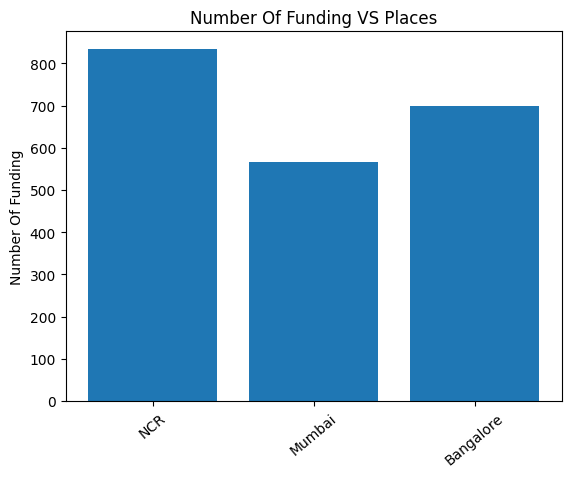

In [30]:
# Plotting the Bar Graph
plt.bar(TopPlace,TopTotal)
plt.ylabel('Number Of Funding')
plt.title('Number Of Funding VS Places')
plt.xticks(rotation=40)
plt.show()

##### Question 2nd:
Even after trying for so many times, your
friend's startup could not find the
investment. So you decided to take this
matter in your hand and try to find the list of
investors who probably can invest in your
friend's startup. Your list will increase the
chance of your friend startup getting some
initial investment by contacting these
investors. Find the top 5 investors who have
invested maximum number of times
(consider repeat investments in one
company also). In a startup, multiple
investors might have invested. So consider
each investor for that startup. Ignore
undisclosed investors.

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('StartUp_Funding.csv',encoding = 'utf-8')
print(df.dtypes)

Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
Remarks              object
dtype: object


In [9]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [10]:
df['Investors Name'].dropna(inplace = True)
print(df.dtypes)

Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
Remarks              object
dtype: object


In [11]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [12]:
df.dropna(subset=['Investors Name'],inplace=True)
d = {}
for i in df['Investors Name']:
    # print(i)
    if i == '':
        continue
    j = i.split(',')
    for k in j:
        k = k.strip()
        if k != "":
            if k in d:
                d[k] += 1
            else:
                d[k] = 1

In [13]:
ans = sorted(d.items(), key=lambda x:x[1], reverse= True)
ans = ans[:5]
print(ans)

[('Sequoia Capital', 72), ('Accel Partners', 68), ('Kalaari Capital', 50), ('SAIF Partners', 47), ('Blume Ventures', 47)]


In [14]:
Names = []
Count = []
for i in range (0,len(ans)):
    Names.append(ans[i][0])
    Count.append(ans[i][1])
print(Names)
print(Count)

['Sequoia Capital', 'Accel Partners', 'Kalaari Capital', 'SAIF Partners', 'Blume Ventures']
[72, 68, 50, 47, 47]


Investors with total number of time
Sequoia Capital :  72
Accel Partners :  68
Kalaari Capital :  50
SAIF Partners :  47
Blume Ventures :  47


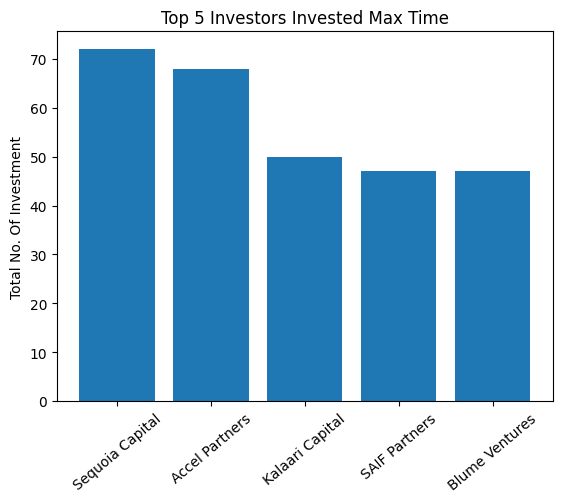

In [52]:
print('Investors with total number of time')
for i in range(0,len(Names)):
    print(Names[i],': ',Count[i])
plt.bar(Names,Count)
plt.title("Top 5 Investors Invested Max Time")
plt.ylabel("Total No. Of Investment")
plt.xticks(rotation = 40)
plt.show()

#### Question 3rd:
After re-analysing the dataset you found out
that some investors have invested in the
same startup at different number of funding
rounds. So before finalising the previous list,
you want to improvise it by finding the top 5
investors who have invested in different
number of startups. This list will be more
helpful than your previous list in finding the
investment for your friend startup. Find the
top 5 investors who have invested maximum
number of times in different companies. That
means, if one investor has invested multiple
times in one startup, count one for that
company. There are many errors in startup
names. Ignore correcting all, just handle the
important ones - Ola, Flipkart, Oyo and
Paytm.

In [32]:
df2 = pd.read_csv('StartUp_Funding.csv',encoding='utf-8')
df2.columns = ['SrNo.','Date','Startup Name','Industry Vertical','SubVertical','City Location','Investors Name','Investment Type','Amount In USD','Remark']
# Checking the column names.
ColumnNames = list(df2)
df2.head(1)

,SrNo.,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount In USD,Remark
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN


In [35]:
# Drop NULL values
df.dropna(subset=['Investors Name','Startup Name'],inplace=True)

# Replace Names with the correct names
df['Startup Name'].replace('Flipkart.com','Flipkart',inplace=True)
df['Startup Name'].replace('Ola Cabs','Ola',inplace=True)
df['Startup Name'].replace('Olacabs','Ola',inplace=True)
df['Startup Name'].replace('Ola Cabs','Ola',inplace=True)
df['Startup Name'].replace('Olacabs','Ola',inplace=True)
df['Startup Name'].replace('Oyo Rooms','Oyo',inplace=True)
df['Startup Name'].replace('Oyorooms','Oyo',inplace=True)
df['Startup Name'].replace('OyoRooms','Oyo',inplace=True)
df['Startup Name'].replace('OYO Rooms','Oyo',inplace=True)
df['Startup Name'].replace('Paytm Marketplace','Paytm',inplace=True)

In [36]:
df.dtypes

Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
Remarks              object
dtype: object

In [37]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           930
City  Location        180
Investors Name          0
InvestmentnType         4
Amount in USD         956
Remarks              2602
dtype: int64

In [38]:
StartUp = list(df['Startup Name'])
Investor = list(df['Investors Name'])
d = {}
print(len(StartUp) == len(Investor))
for i in range (0,len(StartUp)):
    Invest = Investor[i].split(',')
    for j in Invest:
        j = j.strip()
        if j != '':
            if j in d:
                s = d[j]
                s.add(StartUp[i])
                d[j] = s
            else:
                d[j] = {StartUp[i]}

print(d)

True
{'Tiger Global Management': {'CleverTap', 'Shopclues', 'Grofers', 'INDwealth', 'Vedantu', 'OkCredit', 'Delhivery', 'BlackBuck', 'LocalOye', 'Moglix', 'Chaayos', 'Saavn', 'Zenoti', 'Roposo.com', 'Grey Orange', 'BYJU’S', 'Lybrate', 'Razorpay', 'Zo Rooms', 'Cube26'}, 'Susquehanna Growth Equity': {'Shuttl'}, 'Sequoia Capital India': {'Mamaearth', 'HealthKart', 'Moglix', 'OncoStem', 'Belong', 'Grofers', 'CleverTap', 'Oyo', 'FreshDesk', 'Pocket Aces', 'Blackbuck', 'Unacademy', 'Dhruva', 'DailyHunt', 'Meesho', 'Faasos'}, 'Vinod Khatumal': {'https://www.wealthbucket.in/'}, 'Sprout Venture Partners': {'Fashor'}, 'Chiratae Ventures': {'HealthifyMe', 'Pando'}, 'Ant Financial': {'Zomato', 'Paytm'}, 'Sathguru Catalyzer Advisors': {'Ecozen'}, 'Ping An Global Voyager Fund': {'CarDekho'}, 'Mumbai Angels': {'Joy by nature', 'Massblurb', 'Fitpass', 'BookEventz', 'AppsDaily', 'Babychakra', 'MintM', 'Azuro', 'Dhruva Space', 'FalconBrick', 'Wittyparot', 'Register My Marriage', 'DoSelect', 'Betaout', '

In [39]:
for key in d:
    d[key]=len(d[key])

ans1 = sorted(d.items(), key=lambda x:x[1], reverse= True)
ans1[:5]

[('Accel Partners', 59),
 ('Sequoia Capital', 53),
 ('Kalaari Capital', 47),
 ('Blume Ventures', 43),
 ('Indian Angel Network', 41)]

In [126]:
Investor_Name = []
Total_val = []

# As we need top 5 we take len form 0-5
for i in range(0,5):
    Investor_Name.append(ans1[i][0])
    Total_val.append(ans1[i][1])

print(Investor_Name)
print(Total_val)

['Accel Partners', 'Sequoia Capital', 'Kalaari Capital', 'Blume Ventures', 'Indian Angel Network']
[59, 53, 47, 43, 41]


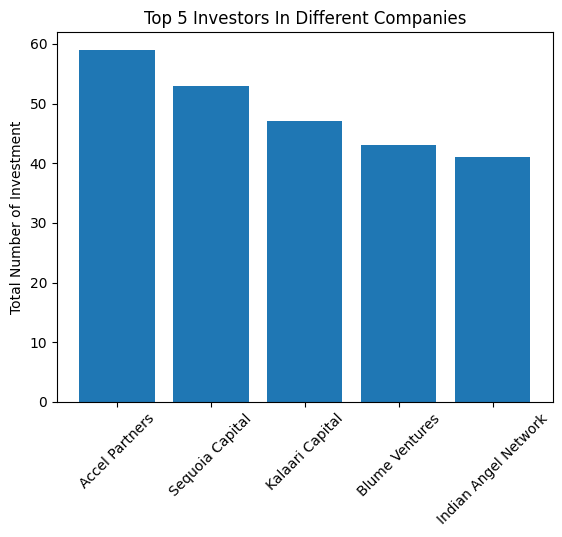

In [127]:
# PLotting the graph
plt.title('Top 5 Investors In Different Companies')
plt.bar(Investor_Name,Total_val)
plt.ylabel('Total Number of Investment')
plt.xticks(rotation = 45)
plt.show()

#### Question 4
.Even after putting so much effort in finding
the probable investors, it didn't turn out to be
helpful for your friend. So you went to your
investor friend to understand the situation
better and your investor friend explained to
you about the different Investment Types
and their features. This new information will
be helpful in finding the right investor. Since
your friend startup is at an early stage
startup, the best-suited investment type
would be - Seed Funding and Crowdfunding.
Find the top 5 investors who have invested
in a different number of startups and their
investment type is Crowdfunding or Seed
Funding. Correct spelling of investment types
are - "Private Equity", "Seed Funding", "Debt
Funding", and "Crowd Funding". Keep an
eye for any spelling mistake. You can find
this by printing unique values from this
column. There are many errors in startup
names. Ignore correcting all, just handle the
important ones - Ola, Flipkart, Oyo and
Paytm.

In [42]:
df3 = pd.read_csv('StartUp_Funding.csv',encoding='utf-8')
df3.columns = ['SrNo.','Date','Startup Name','Industry Vertical','SubVertical','City Location','Investors Name','Investment Type','Amount In USD','Remark']
# Checking the column names.
ColumnNames = list(df3)
df3.head(1)

,SrNo.,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount In USD,Remark
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN


In [46]:
# DropIng the NAN values from the required columns.
df3.dropna(subset=['Investors Name','Startup Name','Investment Type'],inplace=True)
df3 = df3.reset_index(drop = True)

# Correcting the Investment Type spellings for further use.
df3['Investment Type'].replace('PrivateEquity','Private Equity',inplace=True)
df3['Investment Type'].replace('SeedFunding','Seed Funding',inplace=True)
df3['Investment Type'].replace('Crowd funding','Crowd Funding',inplace=True)

# Changing the Investor Name for Undisclosed investors.
df3['Investors Name'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)

# Correcting the Startup Name values for the use.
df3['Startup Name'].replace('Flipkart.com','Flipkart',inplace=True)
df3['Startup Name'].replace('Ola Cabs','Ola',inplace=True)
df3['Startup Name'].replace('Olacabs','Ola',inplace=True)
df3['Startup Name'].replace('Ola Cabs','Ola',inplace=True)

df3['Startup Name'].replace('Olacabs','Ola',inplace=True)
df3['Startup Name'].replace('Oyo Rooms','Oyo',inplace=True)
df3['Startup Name'].replace('Oyorooms','Oyo',inplace=True)
df3['Startup Name'].replace('OyoRooms','Oyo',inplace=True)
df3['Startup Name'].replace('OYO Rooms','Oyo',inplace=True)
df3['Startup Name'].replace('Paytm Marketplace','Paytm',inplace=True)

In [47]:
df3 = df3[(df3['Investment Type']=='Seed Funding') | (df3['Investment Type']=='Crowd Funding')]
# df3.reindex(inplace=True)


Startup_List = df3['Startup Name']
Investor_List = df3['Investors Name']

print(Investor_List)
print(Startup_List)
dic = {}

for i in range(0,len(Investor_List)):
    names = Investor_List[i].split(',')
    for name in names:
        name = name.strip()
        if (name != "") and (name != "Undisclosed Investors"):
            if name in dic:
                b = dic[name]
                b.add(Startup_List[i])
                dic[name] = b
            else:
                dic[name] = {Startup_List[i]}

for key in dic:
    dic[key] = len(dic[key])

0                               Dream Incubator
1                          Amour Infrastructure
2                        Nexus Venture Partners
3                       Unnamed angel investors
4                     Lightspeed India Partners
                         ...                   
1345            Michael & Susan Dell Foundation
1346                   Group of Angel Investors
1347    August Capital Partners, Michael Blakey
1348    Inventus Capital Partners, IDG Ventures
1349          UK based Group of Angel Investors
Name: Investors Name, Length: 1350, dtype: object
0             SuperGaming
1       Digital Mall Asia
2                Bolo App
3                    Azah
4                    Setu
              ...        
1345              Villgro
1346         Corporate360
1347            Freshmonk
1348           Aasaanjobs
1349     couponmachine.in
Name: Startup Name, Length: 1350, dtype: object


In [48]:
ans2 = sorted(dic.items(), key=lambda x:x[1], reverse= True)
ans2[:5]

[('Indian Angel Network', 33),
 ('Rajan Anandan', 24),
 ('LetsVenture', 16),
 ('Anupam Mittal', 16),
 ('Kunal Shah', 14)]

In [49]:
Investor_Name = []
Total_val = []

# As we need top 5 we take len form 0-5
for i in range(0,5):
    Investor_Name.append(ans2[i][0])
    Total_val.append(ans2[i][1])

print(Investor_Name)
print(Total_val)

['Indian Angel Network', 'Rajan Anandan', 'LetsVenture', 'Anupam Mittal', 'Kunal Shah']
[33, 24, 16, 16, 14]


Indian Angel Network :  33
Rajan Anandan :  24
LetsVenture :  16
Anupam Mittal :  16
Kunal Shah :  14


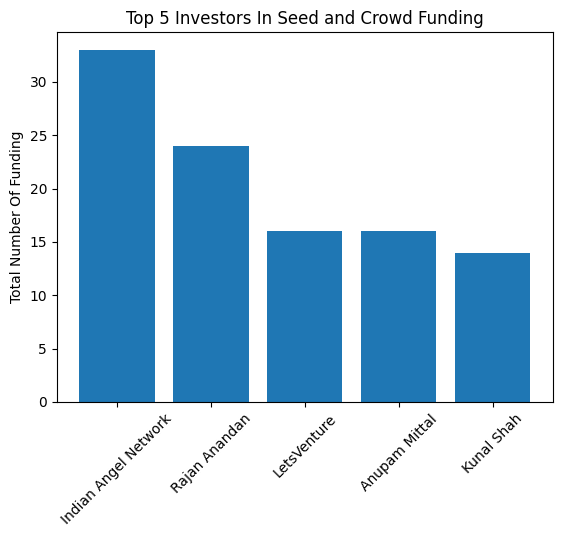

In [56]:
# PLotting the graph
for i in range(0,len(Investor_Name)):
    print(Investor_Name[i],": ",Total_val[i])
plt.title('Top 5 Investors In Seed and Crowd Funding')
plt.ylabel("Total Number Of Funding")
plt.bar(Investor_Name,Total_val)
plt.xticks(rotation = 45)
plt.show()

#### PROBLEM 5.
. Due to your immense help, your friend
startup successfully got seed funding and it
is on the operational mode. Now your friend
wants to expand his startup and he is
looking for new investors for his startup.
Now you again come as a saviour to help
your friend and want to create a list of
probable new new investors. Before moving
forward you remember your investor friend
advice that finding the investors by
analysing the investment type. Since your
friend startup is not in early phase it is in
growth stage so the best-suited investment
type is Private Equity. Find the top 5
investors who have invested in a different
number of startups and their investment
type is Private Equity. Correct spelling of
investment types are - "Private Equity",
"Seed Funding", "Debt Funding", and
"Crowd Funding". Keep an eye for any
spelling mistake. You can find this by printing
unique values from this column. There are
many errors in startup names. Ignore
correcting all, just handle the important ones
- Ola, Flipkart, Oyo and Paytm.

In [85]:
df4 =pd.read_csv('StartUp_Funding.csv', encoding='utf-8')
df4.head(1)
df4.columns = ['SrNo.','Date','Startup Name','Industry Vertical','SubVertical','City Location','Investors Name','Investment Type','Amount In USD','Remark']

In [96]:
df4.dropna(subset=['Investors Name','Startup Name','Investment Type'],inplace=True)

df4['Investment Type'].replace('PrivateEquity','Private Equity',inplace=True)
df4['Investment Type'].replace('SeedFunding','Seed Funding',inplace=True)
df4['Investment Type'].replace('Crowd funding','Crowd Funding',inplace=True)

df4['Investors Name'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)

df4['Startup Name'].replace('Flipkart.com','Flipkart',inplace=True)
df4['Startup Name'].replace('Ola Cabs','Ola',inplace=True)
df4['Startup Name'].replace('Olacabs','Ola',inplace=True)
df4['Startup Name'].replace('Ola Cabs','Ola',inplace=True)
df4['Startup Name'].replace('Olacabs','Ola',inplace=True)
df4['Startup Name'].replace('Oyo Rooms','Oyo',inplace=True)
df4['Startup Name'].replace('Oyorooms','Oyo',inplace=True)
df4['Startup Name'].replace('OyoRooms','Oyo',inplace=True)
df4['Startup Name'].replace('OYO Rooms','Oyo',inplace=True)
df4['Startup Name'].replace('Paytm Marketplace','Paytm',inplace=True)

df4=df4[df4['Investment Type']=='Private Equity']
df4 = df4.reset_index(drop = True)

In [97]:
df4.head(3)

,SrNo.,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount In USD,Remark
0,100,12/04/2019,Medlife,E-commerce,Online Medicine,Bengaluru,Prasid Uno Family Trust,Private Equity,"1,70,00,000",NaN
1,101,10/04/2019,Kabadiwala,E-commerce,Waste Management,Bhopal,"Unilever, Beehive Capital Advisor, ABCOM Inves...",Private Equity,"4,30,665",NaN
2,143,25/11/2018,InCred Finance,Finance,SME Lending,India,"Paragon Partners, Individual Investors",Private Equity,"4,20,00,000",NaN


In [105]:
Investor_ = list(df4['Investors Name'])
StartUp_ = list(df4['Startup Name'])

dc = {}

for i in range(0,len(Investor_)):
    Names = Investor_[i].split(',')
    for Name in Names:
        Name = Name.strip()
        if Name != "" and Name != "Undisclosed Investors":
            if Name in dc:
                s = dc[Name]
                s.add(StartUp_[i])
                dc[Name] = s
            else:
                dc[Name] = {StartUp_[i]}

for key in dc:
    dc[key] = len(dc[key])


In [132]:
ans3 = sorted(dc.items(), key=lambda x:x[1], reverse= True)
ans3[:5]

[('Accel Partners', 53),
 ('Sequoia Capital', 49),
 ('Kalaari Capital', 39),
 ('Blume Ventures', 31),
 ('SAIF Partners', 26)]

In [133]:
Investors = []
TotalNo = []
for i in range(0,5):
    Investors.append(ans3[i][0])
    TotalNo.append(ans3[i][1])

print(Investors)
print(TotalNo)

['Accel Partners', 'Sequoia Capital', 'Kalaari Capital', 'Blume Ventures', 'SAIF Partners']
[53, 49, 39, 31, 26]


In [135]:
for i in range(0,len(Investors)):
    print(Investors[i],TotalNo[i])

Accel Partners 53
Sequoia Capital 49
Kalaari Capital 39
Blume Ventures 31
SAIF Partners 26


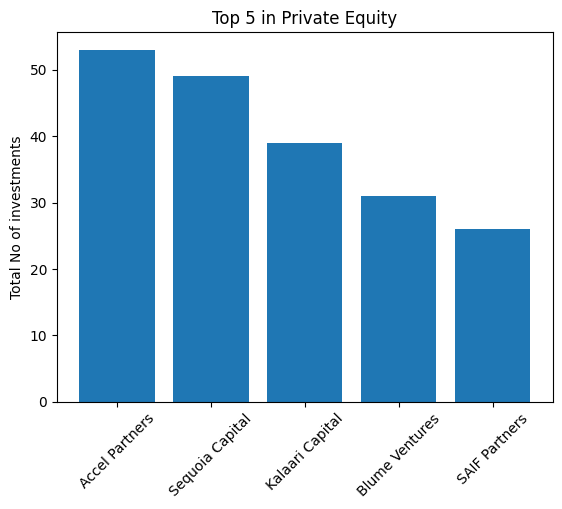

In [136]:
plt.bar(Investors,TotalNo)
plt.title("Top 5 in Private Equity")
plt.xticks(rotation=45)
plt.ylabel("Total No of investments")
plt.show()